In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# %matplotlib wx
%matplotlib inline

In [3]:
def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * x * x + b * x + c

def inverse_quadratic(x, a, b, c):
    return (-b + np.sqrt(b**2 - 4*a*(c-x))) / (2*a)

def show_fit(actual, predicted):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(actual, predicted, 'b.')
    return actual - predicted

def fit_and_plot(x, y, fit_fn):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'b.')
    popt, pcov = curve_fit(fit_fn, x, y)
    xfine = np.linspace(min(x), max(x), 100)
    ax.plot(xfine, fit_fn(xfine, *popt), 'r-')
    return popt, pcov

def fit_and_plot_semilogy(x, y, fit_fn):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'b.')
    popt, pcov = curve_fit(fit_fn, x, y)
    xfine = np.linspace(min(x), max(x), 100)
    ax.semilogy(xfine, fit_fn(xfine, *popt), 'r-')
    return popt, pcov

In [4]:
dataset = pd.read_csv("/Users/r/Projects/ParticleZen/zzen/calibration/20170803b.csv", skipinitialspace = True)
# Vx fields were reported 1000x their actual values.  Fix now...
dataset['Vadc0'] = dataset['Vadc0'] / 1000.0
dataset['Vadc1'] = dataset['Vadc1'] / 1000.0
dataset['Vadc2'] = dataset['Vadc2'] / 1000.0
dataset['Vadc3'] = dataset['Vadc3'] / 1000.0
# While we're at it, let's work using log10(R) rather than R...
dataset.loc[0,'R'] = 0.01  # realistically smallest resistance
dataset['Rlog'] = np.log10(dataset['R'])
dataset

,R,Vadc0,Vadc1,Vadc2,Vadc3,Rlog
0,0.01,0.009470,0.000576,-0.000347,0.000017,-2.000000
1,1.00,0.022199,0.001351,0.000057,-0.000169,0.000000
2,10.00,0.113271,0.010059,0.000073,-0.000319,1.000000
3,100.00,0.568351,0.086356,0.002721,0.000166,2.000000
4,1000.00,0.929621,0.484863,0.029240,0.000765,3.000000
5,10000.00,0.990057,0.902194,0.230510,0.010714,4.000000
6,100000.00,0.996778,0.986828,0.748267,0.120349,5.000000
7,1000000.00,0.997378,0.996791,0.969356,0.464129,6.000000
8,9000000.00,0.997445,0.997029,0.982250,0.474602,6.954243


Define a model that maps Vx to R

In [8]:
def model_a(vadc, vdrv, rdrv):
    r = rdrv * vadc / (vdrv - vadc)
    return r
def model_b(vadc, vdrv, rdrvlog):
    r = np.power(10.0, rdrvlog) * vadc / (vdrv - vadc)
    return r

In [9]:
popt0a, _ = curve_fit(model_a, dataset['Vadc0'], dataset['R'])
popt1a, _ = curve_fit(model_a, dataset['Vadc1'], dataset['R'])
popt2a, _ = curve_fit(model_a, dataset['Vadc2'], dataset['R'])
popt3a, _ = curve_fit(model_a, dataset['Vadc3'], dataset['R'])
[popt0a, popt1a, popt2a, popt3a]

[array([  0.99745301,  75.01041165]),
 array([   0.99705912,  269.1639567 ]),
 array([  9.83891142e-01,   1.50371364e+04]),
 array([  4.75945804e-01,   2.54828632e+04])]

In [10]:
popt0b, _ = curve_fit(model_b, dataset['Vadc0'], dataset['R'])
popt1b, _ = curve_fit(model_b, dataset['Vadc1'], dataset['R'])
popt2b, _ = curve_fit(model_b, dataset['Vadc2'], dataset['R'])
popt3b, _ = curve_fit(model_b, dataset['Vadc3'], dataset['R'])
[popt0b, popt1b, popt2b, popt3b]

/Users/r/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


[array([ 0.99745301,  1.87512155]),
 array([ 0.99705912,  2.43001691]),
 array([ 0.98389114,  4.17716514]),
 array([ 0.4759458 ,  4.40624822])]

/Users/r/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


(array([ 0.4759458 ,  4.40624822]),
 array([[  2.80087297e-09,   8.95388058e-07],
        [  8.95388058e-07,   2.89012447e-04]]))

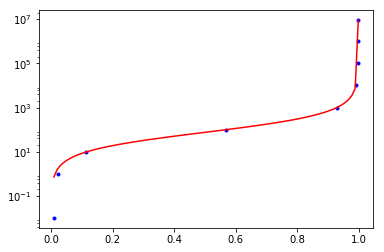

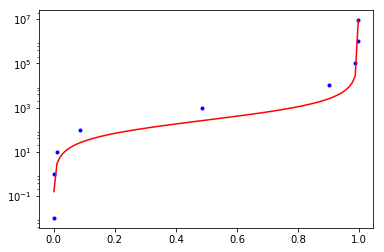

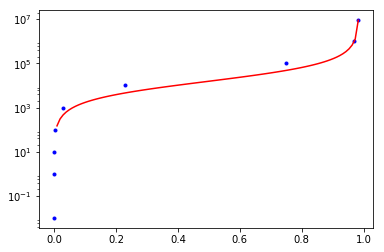

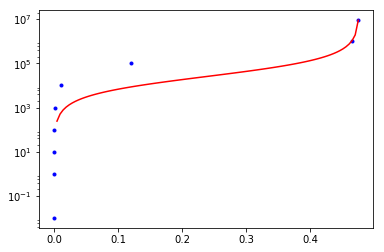

In [11]:
fit_and_plot_semilogy(dataset['Vadc0'], dataset['R'], model_b)
fit_and_plot_semilogy(dataset['Vadc1'], dataset['R'], model_b)
fit_and_plot_semilogy(dataset['Vadc2'], dataset['R'], model_b)
fit_and_plot_semilogy(dataset['Vadc3'], dataset['R'], model_b)

In [14]:
dataset['R'][0:6]

0        0.01
1        1.00
2       10.00
3      100.00
4     1000.00
5    10000.00
Name: R, dtype: float64

In [13]:
dataset['R'][4:]

4       1000.0
5      10000.0
6     100000.0
7    1000000.0
8    9000000.0
Name: R, dtype: float64

It's worth noting that since we're not going to use the full range of any one driver, we can get better fits by limiting the curve fit to a subset of the data.

(array([  1.00027687,  76.00513493]),
 array([[  2.67235072e-07,   2.85060102e-04],
        [  2.85060102e-04,   3.06219992e-01]]))

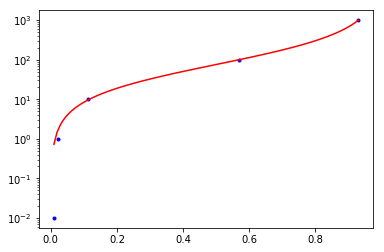

In [28]:
fit_and_plot_semilogy(dataset['Vadc0'][0:5], dataset['R'][0:5], model_a)

(array([  9.97222635e-01,   1.05333803e+03]),
 array([[  4.92553924e-12,   4.94677949e-07],
        [  4.94677949e-07,   5.00791240e-02]]))

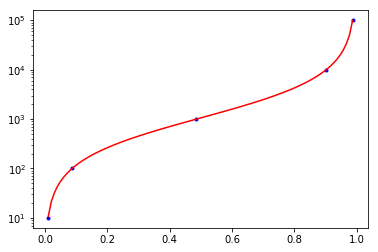

In [29]:
fit_and_plot_semilogy(dataset['Vadc1'][2:7], dataset['R'][2:7], model_a)

(array([  1.00225376e+00,   3.39380768e+04]),
 array([[  1.38027185e-09,   1.41149895e-03],
        [  1.41149895e-03,   1.45447502e+03]]))

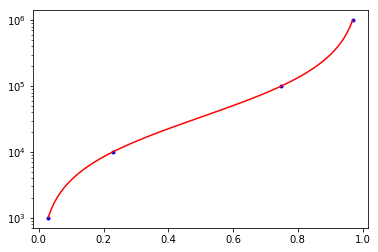

In [30]:
fit_and_plot_semilogy(dataset['Vadc2'][4:8], dataset['R'][4:8], model_a)

(array([  4.75945804e-01,   2.54828619e+04]),
 array([[  9.80197438e-09,   1.83863449e-01],
        [  1.83863449e-01,   3.48228734e+06]]))

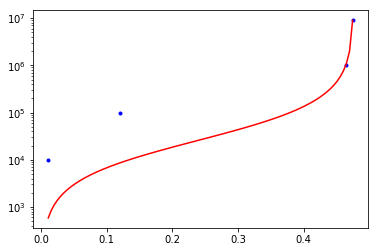

In [31]:
fit_and_plot_semilogy(dataset['Vadc3'][5:], dataset['R'][5:], model_a)

(array([ 0.4759458,  4.4062482]), array([[  9.80197641e-09,   3.13351343e-06],
        [  3.13351343e-06,   1.01143233e-03]]))

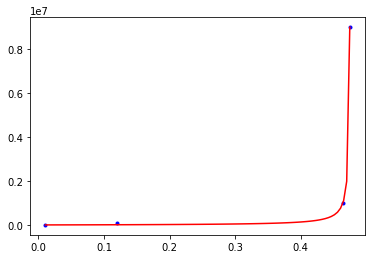

In [24]:
fit_and_plot(dataset['Vadc3'][5:], dataset['R'][5:], model_b)

In the last set (Vadc3), the fit is still poor.  Not that Vadc never exceeds 0.5 or so.  I believe this is because of the high impedance posed by the 1M resistor on Rdrv3.  It's quite possible that the input capacitance on the ADC means that Vdrv doesn't have time to fully charge the input.

A simple test would be to double (or triple) the # of reads we take with the identical drive.  This will slow things down, but if we see different results, it will support the theory.

If that's the case, a real fix would be to make the sample time proportional to the drive resistor, and drive the adc longer for higher series resistors.

So I tried taking four consecutive reads on the A/D with the same input, but that didn't significantly change the output: it might have increased from 0.475 to 0.477.  

So the next theory is that the input impedance to the A/D system is on the order of 1M ohm, i.e. dividing down half the voltage.  Checking the specs...